In [ ]:
from google.colab import files
uploaded =files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
data=pd.read_csv('data.csv')
pd.options.display.max_columns=len(data) # Afficher tous les colonnes de la table pas seulement les premiéres et les derniéres colonnes
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [ ]:
print(f'Number of entries: {data.shape[0]}')
print(f'Number of features: {data.shape[1]}')

Number of entries: 569
Number of features: 33


In [ ]:
detection=sum(data['diagnosis']=='M')
women_detection=(detection/len(data))*100
print(f'women detection with a canser is {women_detection}%')

women detection with a canser is 37.258347978910365%


In [ ]:
df=data.select_dtypes(include=['number'])
df=data.drop(['id','diagnosis','Unnamed: 32'],axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


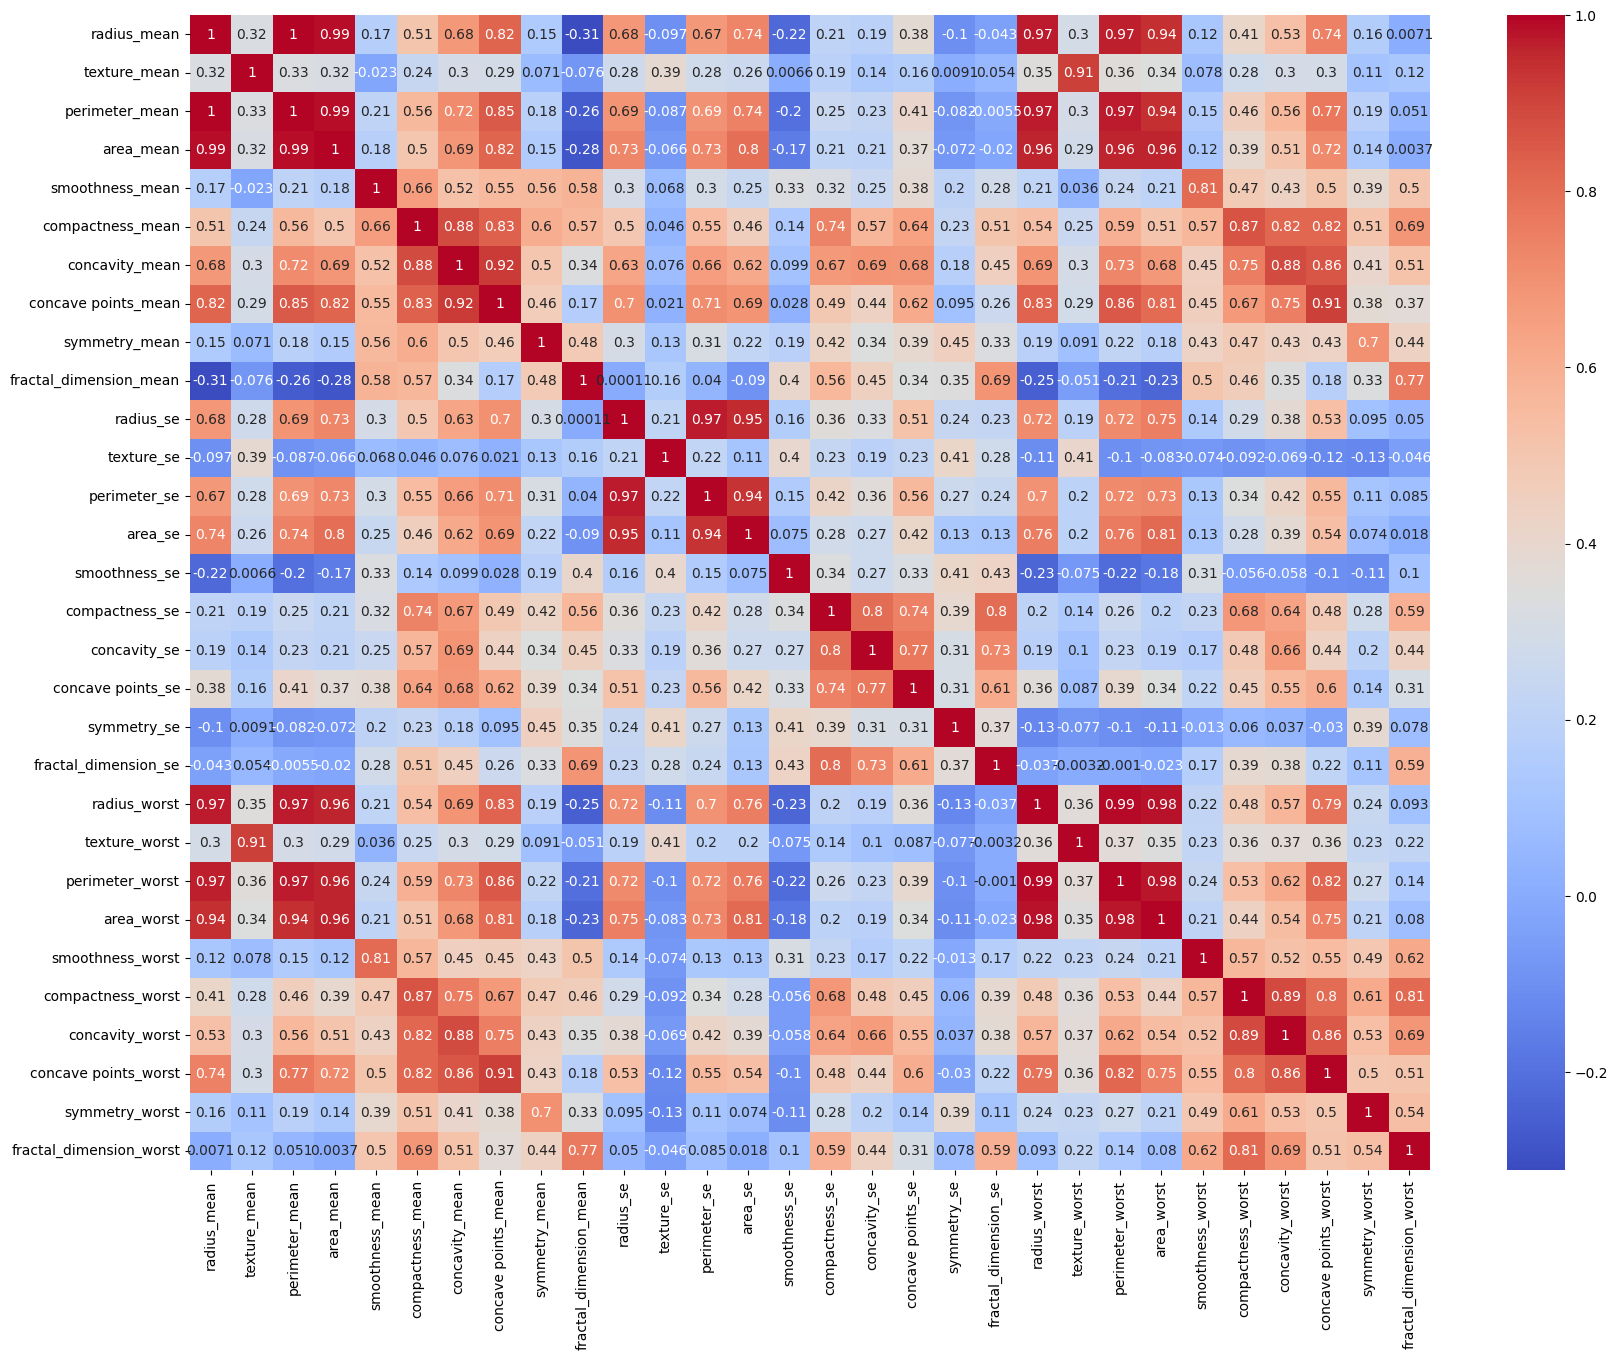

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [ ]:
x=data.drop(['id','diagnosis','Unnamed: 32'],axis=1)
y=data['diagnosis']

In [ ]:
from sklearn.preprocessing import LabelEncoder,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


def encode_labels(y):
    le = LabelEncoder()
    return le.fit_transform(y)

Pre_X=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
    ])

Prossecor=ColumnTransformer(transformers=[
    ('Pre_x',Pre_X,x.columns)
])

model_KNN=Pipeline(steps=[
    ('Prossecor',Prossecor),
    ('model',KNeighborsClassifier(n_neighbors=2)),
])
model_SVM=Pipeline(steps=[
    ('Prossecor',Prossecor),
    ('SVM',SVC(kernel='linear',C=1.0))
    ])

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train=encode_labels(y_train)
y_test=encode_labels(y_test)

# Entraîner KNN
model_KNN.fit(X_train, y_train)
y_pred_knn = model_KNN.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy KNN: {accuracy_knn:.2f}')

# Entraîner SVM
model_SVM.fit(X_train, y_train)
y_pred_svm = model_SVM.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy SVM: {accuracy_svm:.2f}')




Accuracy KNN: 0.95
Accuracy SVM: 0.96


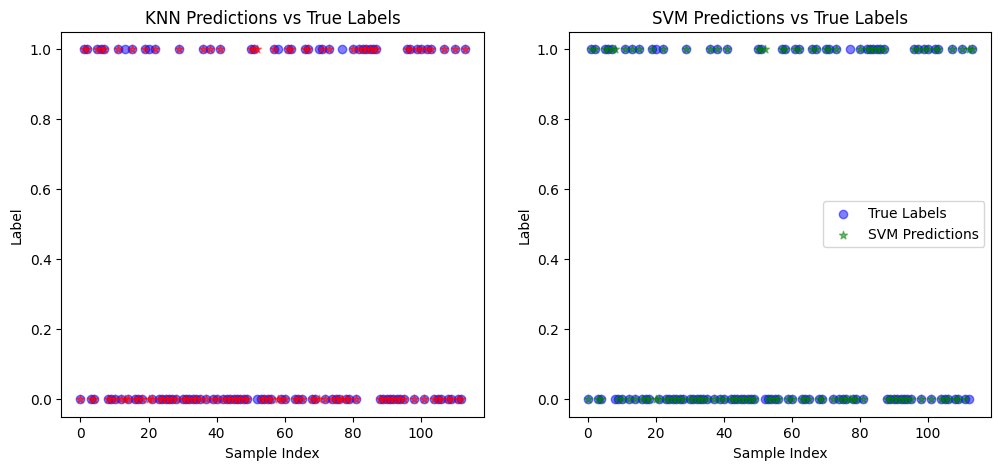

In [ ]:

# Afficher les graphiques de comparaison
plt.figure(figsize=(12, 5))

# Graphique pour KNN
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.5, marker='o')
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='red', label='KNN Predictions', alpha=0.5, marker='*')
plt.title('KNN Predictions vs True Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
# Graphique pour SVM
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.5, marker='o')
plt.scatter(range(len(y_pred_svm)), y_pred_svm, color='green', label='SVM Predictions', alpha=0.5, marker='*')
plt.title('SVM Predictions vs True Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()



In [ ]:
import numpy as np
new_samples = np.array([[15.78, 20.34, 0.067, 0.167, 0.021, 0.029, 0.006, 0.021, 0.056,
                         0.018, 0.043, 0.22, 0.158, 0.062, 0.084, 0.057,
                         0.037, 0.010, 0.5, 0.3, 0.4, 0.8, 1.2, 0.3, 0.7, 0.2, 1.5, 0.9, 0.6,0.3]])  # Ajustez ces valeurs


# Convertir en DataFrame avec les noms de colonnes appropriés
new_samples_df = pd.DataFrame(new_samples, columns=x.columns)  # Assurez-vous que x.columns a les bons noms

# Prédire la classe avec le modèle KNN
knn_prediction = model_KNN.predict(new_samples_df)
# Prédire la classe avec le modèle SVM
svm_prediction = model_SVM.predict(new_samples_df)

# Affichage des prédictions
print(f'KNN Prediction: {knn_prediction}')
print(f'SVM Prediction: {svm_prediction}')

KNN Prediction: [0]
SVM Prediction: [0]
